In [ ]:
cd /content/drive/MyDrive/CSCI544/PROJECT

/content/drive/MyDrive/CSCI544/PROJECT


In [ ]:
import seaborn
import numpy as np
import pandas as pd
import scipy
import sklearn.metrics as metrics
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")

In [ ]:
label=np.load("test_labels.npy")
predict=np.load("test_prediction.npy")
test=pd.read_csv("data/test.csv")
test = test.drop(test.columns[[0, 1]], axis=1)
test["gender"]=test["gender"].apply(lambda x: "Male" if x else "Female")

[Text(0.5, 1.0, 'Confusion Matrix On Test Set')]

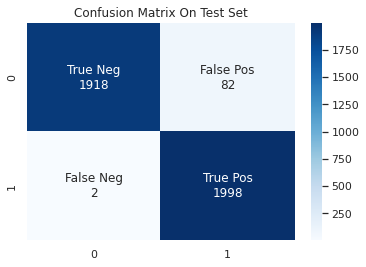

In [ ]:
def softmax(x):
    """Compute softmax values for each sets of scores in x."""
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum(axis=0) # only difference
def get_prob(row):
    return softmax(row)[1]
def get_tag(row):
    return row>0.5
# calculate the fpr and tpr for all thresholds of the classification
predict2=np.apply_along_axis(get_prob, 1, predict)
predict3=np.apply_along_axis(get_tag, 0, predict2)
cf_matrix=metrics.confusion_matrix(label, predict3)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]

labels = [f"{v1}\n{v2}" for v1, v2 in
          zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues').set(title='Confusion Matrix On Test Set')


In [ ]:
pred = np.argmax(predict, axis = 1)
confusion = metrics.confusion_matrix(label, pred)

In [ ]:
confusion

array([[1918,   82],
       [   2, 1998]])

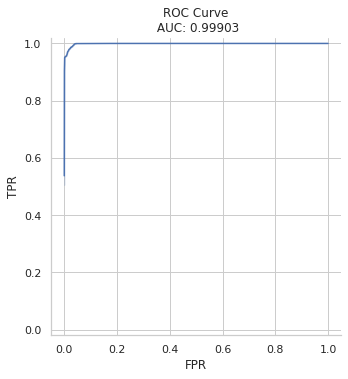

In [ ]:
sns.set_theme(style="whitegrid")

fpr, tpr, threshold = metrics.roc_curve(label, predict2)
roc_auc = metrics.auc(fpr, tpr)

g = sns.relplot(x=fpr, y=tpr, kind="line")
g.set_axis_labels("FPR", "TPR").set(title='ROC Curve\n AUC: %0.5f' % roc_auc)
#g.set_titles('ROC curve, AUC is %0.2f' % roc_auc)
g.set(ylim=(-0.02, 1.02))
g.set()
#g.figure.autofmt_xdate()

In [ ]:
test

,gender,category
0,Male,work
1,Male,work
2,Female,achievement
3,Male,work
4,Female,work
...,...,...
3995,Male,achievement
3996,Female,home
3997,Female,achievement
3998,Male,achievement


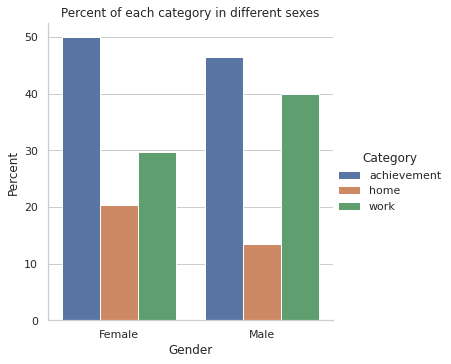

In [ ]:
test2=test.groupby(["gender","category"]).size().reset_index()
test2 = test2.set_axis(['Gender', 'Category', 'Percent'], axis=1, inplace=False)
test2.Percent=test2.Percent.apply(lambda x: x/20)
sns.set_theme(style="whitegrid")
#test = sns.load_dataset("test")
g2 = sns.catplot(x="Gender", y="Percent",hue="Category",kind="bar", data=test2)
g2.set(title='Percent of each category in different sexes')

In [ ]:
test2

,Gender,Category,Percent
0,Female,achievement,50.0
1,Female,home,20.3
2,Female,work,29.7
3,Male,achievement,46.5
4,Male,home,13.5
5,Male,work,40.0


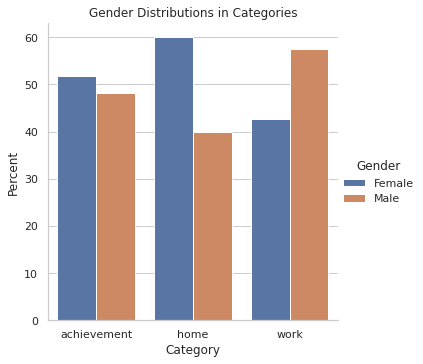

In [ ]:
test3=test.groupby(["category", "gender"]).size().reset_index()
test3 = test3.set_axis(['Category', 'Gender', 'Percent'], axis=1, inplace=False)
test4=test3.groupby("Category").sum().reset_index()
test4=test4["Percent"].values
test4=np.repeat(test4,2)
a=pd.Series(test4)
test3["sum"]=test4
def prep2(x):
    x[2]=x[2]/x[3]
    return x
test3=test3.apply(lambda x: prep2(x), axis=1)


test3.Percent=test3.Percent.apply(lambda x: x*100)
sns.set_theme(style="whitegrid")
#test = sns.load_dataset("test")
g3 = sns.catplot(x="Category", y="Percent",hue="Gender",kind="bar", data=test3)
g3.set(title='Gender Distributions in Categories')

In [ ]:
test3

,Category,Gender,Percent,sum
0,achievement,Female,51.813472,1930
1,achievement,Male,48.186528,1930
2,home,Female,60.059172,676
3,home,Male,39.940828,676
4,work,Female,42.611191,1394
5,work,Male,57.388809,1394


In [ ]:
test

,gender,category
0,Male,work
1,Male,work
2,Female,achievement
3,Male,work
4,Female,work
...,...,...
3995,Male,achievement
3996,Female,home
3997,Female,achievement
3998,Male,achievement


In [ ]:
test.groupby(["category", "gender"]).size()

category     gender
achievement  Female    1000
             Male       930
home         Female     406
             Male       270
work         Female     594
             Male       800
dtype: int64

In [ ]:
label=np.load("test_labels.npy")
predict=np.load("test_prediction.npy")
test=pd.read_csv("data/test.csv")

In [ ]:
test["predict"] = pd.Series(np.argmax(predict, axis=1))

In [ ]:
test

,Unnamed: 0,text,gender,category,predict
0,0,"industry, as well as of his aggressive work of...",1,work,1
1,1,"paid no heed; and he had tied him up, and he p...",1,work,1
2,2,she tried to smile for my sake. it was settle...,0,achievement,0
3,3,he had only two hours' work to do to open comm...,1,work,1
4,4,people in whose company she found herself had ...,0,work,0
...,...,...,...,...,...
3995,3995,"i do not. he is quite correct, and infinitely...",1,achievement,1
3996,3996,who was the other? angele was carried to her...,0,home,0
3997,3997,rachel immediately tried to qualify what she h...,0,achievement,0
3998,3998,mr. clemens had tried to be funny but had fail...,1,achievement,1


In [ ]:
work = test[test["category"] == "work"]
achievement = test[test["category"]=="achievement"]
home = test[test["category"] == "home"]

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(work["gender"], work["predict"])

array([[571,  23],
       [  2, 798]])

In [ ]:
confusion_matrix(achievement["gender"], achievement["predict"])

array([[959,  41],
       [  0, 930]])

In [ ]:
confusion_matrix(home["gender"], home["predict"])

array([[388,  18],
       [  0, 270]])

In [ ]:
cd /content/drive/MyDrive/CSCI544/PROJECT

[Errno 2] No such file or directory: '/content/drive/MyDrive/CSCI544/PROJECT'
/content


In [ ]:
ls

sample_data/


In [ ]:
import seaborn
import numpy as np
import pandas as pd
import scipy
import sklearn.metrics as metrics
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
label=np.load("test_labels.npy")
predict=np.load("test_prediction.npy")
test=pd.read_csv("data/test.csv")
test = test.drop(test.columns[[0, 1]], axis=1)
test["gender"]=test["gender"].apply(lambda x: "Male" if x else "Female")

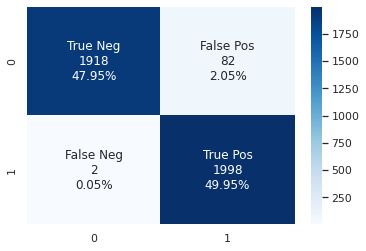

In [ ]:
def softmax(x):
    """Compute softmax values for each sets of scores in x."""
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum(axis=0) # only difference
def get_prob(row):
    return softmax(row)[1]
def get_tag(row):
    return row>0.5
# calculate the fpr and tpr for all thresholds of the classification
predict2=np.apply_along_axis(get_prob, 1, predict)
predict3=np.apply_along_axis(get_tag, 0, predict2)
cf_matrix=metrics.confusion_matrix(label, predict3)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

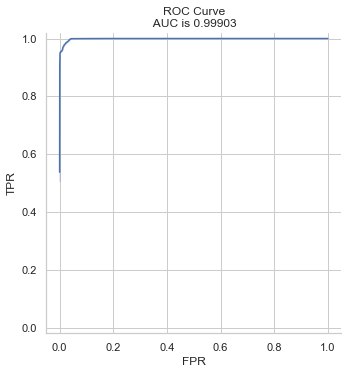

In [ ]:
sns.set_theme(style="whitegrid")

fpr, tpr, threshold = metrics.roc_curve(label, predict2)
roc_auc = metrics.auc(fpr, tpr)

g = sns.relplot(x=fpr, y=tpr, kind="line")
g.set_axis_labels("FPR", "TPR").set(title='ROC Curve\n AUC is %0.5f' % roc_auc)
#g.set_titles('ROC curve, AUC is %0.2f' % roc_auc)
g.set(ylim=(-0.02, 1.02))
g.set()
#g.figure.autofmt_xdate()

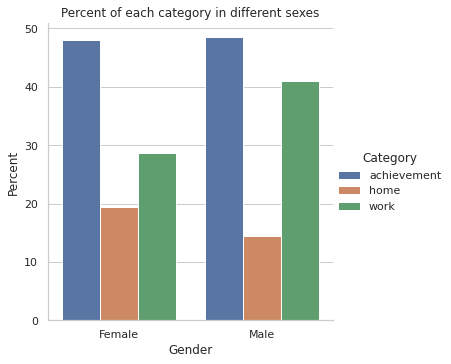

In [ ]:
predict4 = pd.Series(predict3)
predict4=predict4.apply(lambda x: "Male" if x else "Female")

tests=pd.concat([predict4, test.category], axis=1, ignore_index=True)
tests = tests.set_axis(['gender', 'category'], axis=1, inplace=False)
test2=tests.groupby(["gender","category"]).size().reset_index()
test2 = test2.set_axis(['Gender', 'Category', 'Percent'], axis=1, inplace=False)
test2.Percent=test2.Percent.apply(lambda x: x/20)
sns.set_theme(style="whitegrid")
#test = sns.load_dataset("test")
g2 = sns.catplot(x="Gender", y="Percent",hue="Category",kind="bar", data=test2)
g2.set(title='Percent of each category in different sexes')

In [ ]:
test3=tests.groupby(["category", "gender"]).size().reset_index()
test3 = test3.set_axis(['Category', 'Gender', 'Percent'], axis=1, inplace=False)
test4=test3.groupby("Category").sum().reset_index()
test4=test4["Percent"].values
test4=np.repeat(test4,2)
a=pd.Series(test4)
test3["sum"]=test4
def prep2(x):
    x[2]=x[2]/x[3]
    return x
test3=test3.apply(lambda x: prep2(x), axis=1)


test3.Percent=test3.Percent.apply(lambda x: x*100)
sns.set_theme(style="whitegrid")
#test = sns.load_dataset("test")
g3 = sns.catplot(x="Category", y="Percent",hue="Gender",kind="bar", data=test3)
g3.set(title='Gender Distributions in Three Categories')